In [1]:
import pandas as pd
import seaborn as sns
import ast
import matplotlib.pyplot as plt

ay = pd.read_csv('hf://datasets/lukebarousse/data_jobs/data_jobs.csv')

ay['job_posted_date'] = pd.to_datetime (ay['job_posted_date'])

ay['job_skills']= ay['job_skills'].apply(lambda zee: 
                                         ast.literal_eval(zee) 
                                         if pd.notna (zee) else zee)

c:\Users\EMMANUEL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ay_US = ay[ay['job_country'] == 'United States'].dropna(subset=['salary_year_avg'])

In [3]:
job_titles = ay_US['job_title_short'].value_counts().index[:6].to_list()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
ay_US_top6 = ay_US[ay_US['job_title_short'].isin(job_titles)]

ay_US_top6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15030 entries, 92 to 785692
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        15030 non-null  object        
 1   job_title              15030 non-null  object        
 2   job_location           14816 non-null  object        
 3   job_via                15030 non-null  object        
 4   job_schedule_type      15018 non-null  object        
 5   job_work_from_home     15030 non-null  bool          
 6   search_location        15030 non-null  object        
 7   job_posted_date        15030 non-null  datetime64[ns]
 8   job_no_degree_mention  15030 non-null  bool          
 9   job_health_insurance   15030 non-null  bool          
 10  job_country            15030 non-null  object        
 11  salary_rate            15030 non-null  object        
 12  salary_year_avg        15030 non-null  float64       
 13  sala

In [8]:
job_order =ay_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

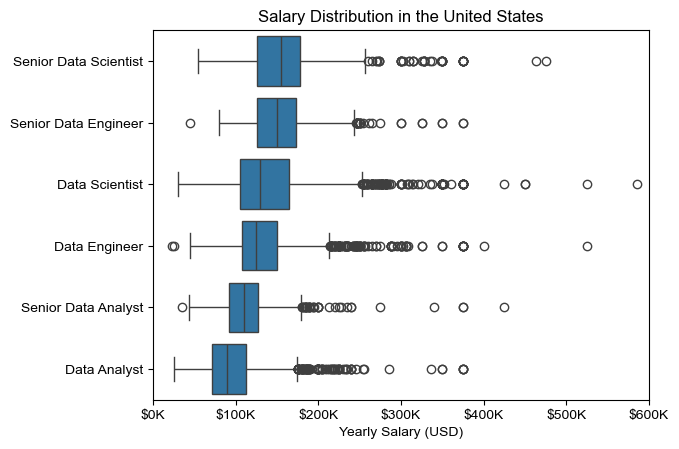

In [9]:
sns.boxplot(data=ay_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the United States')
plt.ylabel("")
plt.xlabel('Yearly Salary (USD)')
plt.xlim (0, 600000)
ax = plt.gca() #gca - get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda z, pos: f'${int (z/1000)}K'))
plt.show()

Investigate Median Salary Vs Skill for Data Analysts

In [10]:
ay_DA_US = ay[(ay['job_title_short'] == 'Data Analyst') & (ay['job_country'] == 'United States')].copy()

ay_DA_US = ay_DA_US.dropna(subset='salary_year_avg')

ay_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [11]:
ay_DA_US = ay_DA_US.explode('job_skills')

ay_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [26]:
dutop_pay= ay_DA_US.groupby('job_skills')['salary_year_avg'].agg(
    ['count', 'median']).sort_values(by='median', ascending=False)

dutop_pay = dutop_pay.head(7)

dutop_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0


In [14]:
dutop_count= ay_DA_US.groupby('job_skills')['salary_year_avg'].agg(
    ['count', 'median']).sort_values(by='count', ascending=False)

dutop_count = dutop_count.head(10)

dutop_count

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


In [16]:
dutop_count = dutop_count.sort_values(by='median', ascending=False)

dutop_count

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


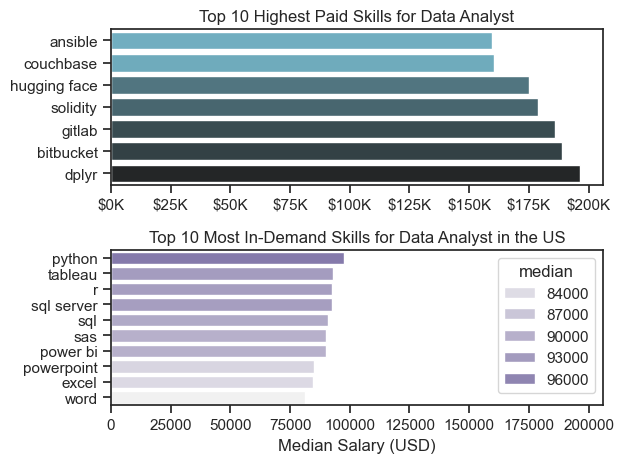

In [ ]:
fig, ax = plt.subplots(2,1)

sns.set_theme (style='ticks')
#explore seaborn library for other colors and format options, r for red

sns.barplot(
    data=dutop_pay, x='median', y=dutop_pay.index, ax=ax[0], hue='median', palette='dark:c_r')
ax[0].legend().remove()
ax[0].invert_yaxis()
ax[0].set_title ('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel ('')
ax[0].set_xlabel ('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda z, pos: f'${int (z/1000)}K'))

sns.barplot(
    data=dutop_count, x='median', y=dutop_count.index, ax=ax[1], hue='median', palette='light:m')
ax[1].set_title ('Top 10 Most In-Demand Skills for Data Analyst in the US')
ax[1].set_ylabel ('')
ax[1].set_xlabel ('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) #to balance the x_axis on both plots

plt.tight_layout () 
#OR 'fig.tight_layout ()' to avoid overlapping
plt.show()

In [43]:
ay_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


In [45]:
da_us_skills = ay_DA_US.groupby('job_skills')['salary_year_avg'].agg(
    ['count', 'median']).sort_values(by='count', ascending=False)

da_us_skills = da_us_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

da_us_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [50]:
ayy_DA_US = ay[(ay['job_title_short'] == 'Data Analyst') & (ay['job_country'] == 'United States')].copy()
ayy_DA_US = ayy_DA_US.dropna(subset='salary_year_avg')
lent = len(ayy_DA_US)

lent

4350

In [51]:
da_us_skills['skill_percent'] = (da_us_skills['skill_count'] / lent) *100
da_us_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [52]:
percent_limit = 5

da_us_skills_high_demand =da_us_skills[da_us_skills['skill_percent'] > percent_limit]

da_us_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


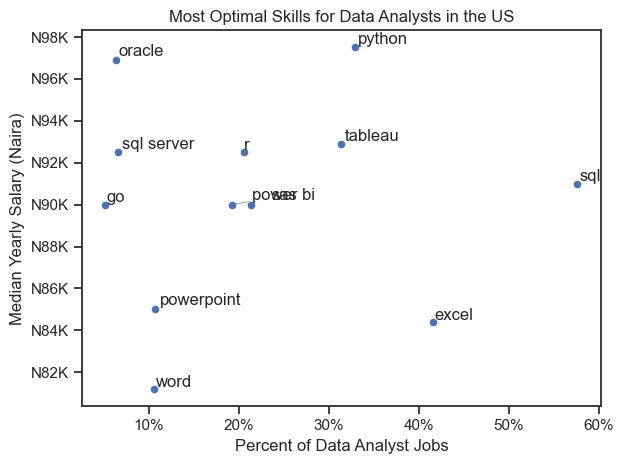

In [78]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

da_us_skills_high_demand.plot(kind='scatter', x= 'skill_percent', y= 'median_salary')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda t, pos: f'N{int (t/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

texts = []

for i, text in enumerate (da_us_skills_high_demand.index):
    texts.append (
        plt.text(da_us_skills_high_demand['skill_percent'].iloc[i], 
                 da_us_skills_high_demand['median_salary'].iloc[i], text))
    
adjust_text(texts, arrowprops= dict (arrowstyle= '->', color='gray',lw=0.5))

plt.xlabel ('Percent of Data Analyst Jobs')
plt.ylabel ('Median Yearly Salary (Naira)')
plt.title ('Most Optimal Skills for Data Analysts in the US')
plt.tight_layout ()
plt.show()

In [80]:
ay_tech = ay['job_type_skills'].copy()

#remove duplicates
ay_tech = ay_tech.drop_duplicates()

#remove NaN values
ay_tech = ay_tech.dropna()

#combine the dictionaries into one
tech_dict = {}
for row in ay_tech:
    row_dict = ast.literal_eval(row)    #convert string to dictionary
    for key, value in row_dict.items():
        if key in tech_dict:    #if key already exists in tech_dict, add value to existing value
            tech_dict[key] += value
        else:                   ##if key does not exist in tech_dict, add key and value
            tech_dict[key] = value

#remove duplicates by converting values to set, then back to list
for key, value in tech_dict.items():
    tech_dict[key] = list(set (value))

tech_dict


{'analyst_tools': ['msaccess',
  'visio',
  'word',
  'sheets',
  'sas',
  'ms access',
  'dax',
  'powerpoint',
  'outlook',
  'cognos',
  'qlik',
  'datarobot',
  'splunk',
  'alteryx',
  'spss',
  'esquisse',
  'power bi',
  'sharepoint',
  'microstrategy',
  'nuix',
  'ssis',
  'excel',
  'ssrs',
  'looker',
  'spreadsheet',
  'powerbi',
  'tableau',
  'sap'],
 'programming': ['typescript',
  'golang',
  'fortran',
  'c#',
  'sas',
  'java',
  'c',
  'go',
  'rust',
  'lisp',
  'matlab',
  'swift',
  't-sql',
  'visual basic',
  'dart',
  'mongo',
  'powershell',
  'html',
  'perl',
  'groovy',
  'scala',
  'f#',
  'css',
  'clojure',
  'c++',
  'ocaml',
  'nosql',
  'vba',
  'visualbasic',
  'sass',
  'python',
  'julia',
  'delphi',
  'r',
  'javascript',
  'lua',
  'solidity',
  'php',
  'pascal',
  'crystal',
  'kotlin',
  'haskell',
  'apl',
  'objective-c',
  'ruby',
  'sql',
  'shell',
  'assembly',
  'erlang',
  'elixir',
  'no-sql',
  'cobol',
  'mongodb',
  'bash',
  'vb.

In [81]:
pd.DataFrame (list (tech_dict.items()), columns=['technology', 'skills'])

,technology,skills
0,analyst_tools,"[msaccess, visio, word, sheets, sas, ms access..."
1,programming,"[typescript, golang, fortran, c#, sas, java, c..."
2,cloud,"[colocation, aws, redshift, aurora, watson, ib..."
3,libraries,"[opencv, selenium, hugging face, keras, gdpr, ..."
4,other,"[unreal, docker, flow, svn, bitbucket, terrafo..."
5,databases,"[elasticsearch, sql server, firebase, firestor..."
6,os,"[fedora, windows, kali, redhat, ubuntu, linux,..."
7,async,"[workfront, monday.com, smartsheet, trello, no..."
8,webframeworks,"[angular.js, deno, rubyon rails, nuxt.js, jque..."
9,sync,"[symphony, wire, google chat, unify, microsoft..."


In [83]:
ay_tech = pd.DataFrame (list (tech_dict.items()), columns=['technology', 'skills'])

ay_tech = ay_tech.explode('skills')

ay_tech

,technology,skills
0,analyst_tools,msaccess
0,analyst_tools,visio
0,analyst_tools,word
0,analyst_tools,sheets
0,analyst_tools,sas
...,...,...
9,sync,zoom
9,sync,ringcentral
9,sync,webex
9,sync,twilio


In [85]:
df_plot = da_us_skills_high_demand.merge(ay_tech, left_on='job_skills', right_on='skills')

df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


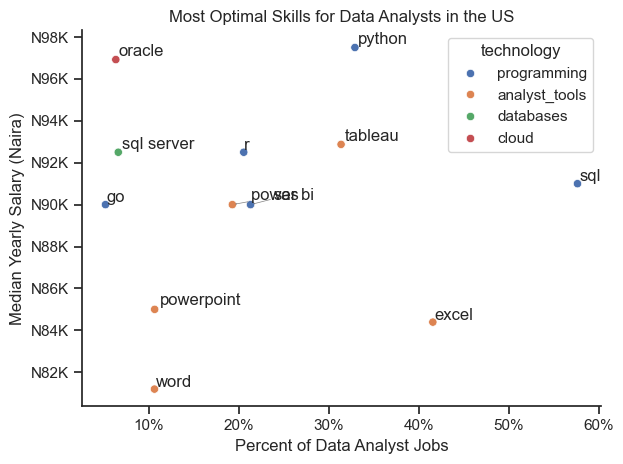

In [87]:
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology',
)

sns.despine()
sns.set_theme(style='ticks')
#da_us_skills_high_demand.plot(kind='scatter', x= 'skill_percent', y= 'median_salary')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda t, pos: f'N{int (t/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

texts = []

for i, text in enumerate (da_us_skills_high_demand.index):
    texts.append (
        plt.text(da_us_skills_high_demand['skill_percent'].iloc[i], 
                 da_us_skills_high_demand['median_salary'].iloc[i], text))
    
adjust_text(texts, arrowprops= dict (arrowstyle= '->', color='gray',lw=0.5))

plt.xlabel ('Percent of Data Analyst Jobs')
plt.ylabel ('Median Yearly Salary (Naira)')
plt.title ('Most Optimal Skills for Data Analysts in the US')
plt.tight_layout ()
plt.show()